<a href="https://colab.research.google.com/github/Jayant1408/Cloth-Classification-Using-Fashion-MNIST-Dataset/blob/main/Cloth_Classification_Using_Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as plt

In [2]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
len(train_labels)

60000

In [7]:
import socket
from socket import socket

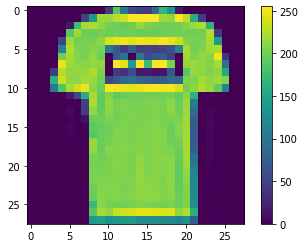

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

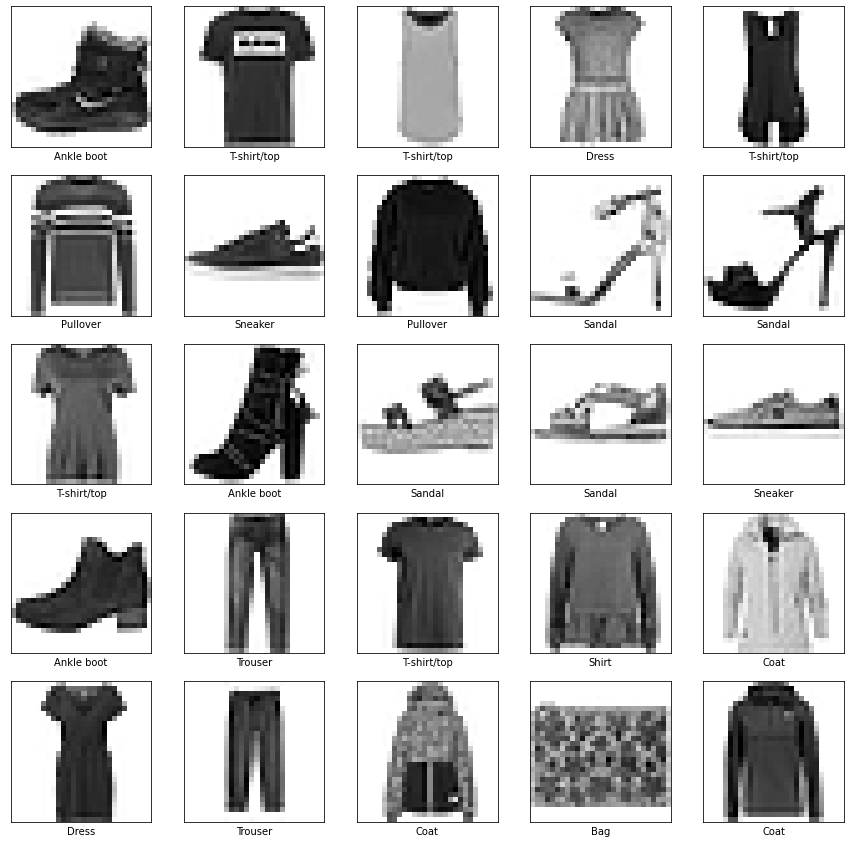

In [14]:
plt.figure(figsize=(15,15))
for i in range(25):

    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)

])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3213 - accuracy: 0.8816
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3031 - accuracy: 0.8893
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2854 - accuracy: 0.8948
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2753 - accuracy: 0.8978
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2623 - accuracy: 0.9020
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2507 - accuracy: 0.9069
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2447 - accuracy: 0.9077
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2354 - accuracy: 0.9111
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2269 - accuracy: 0.9149
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.219

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=4)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8719000220298767


In [24]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_images)


In [27]:
predictions[1]

array([4.8715228e-05, 2.6722326e-14, 9.9978238e-01, 1.5322134e-12,
       1.1578028e-04, 2.9321651e-14, 5.3053696e-05, 2.7126820e-19,
       1.0744273e-09, 1.2924129e-16], dtype=float32)

In [28]:
np.argmax(predictions[1])

2

In [30]:
test_labels[1]

2

In [32]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

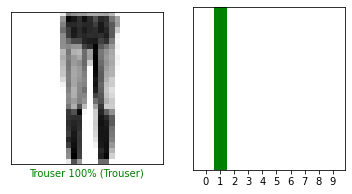

In [34]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


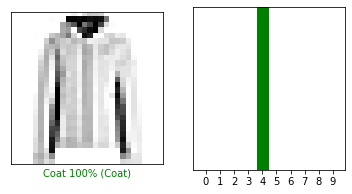

In [35]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

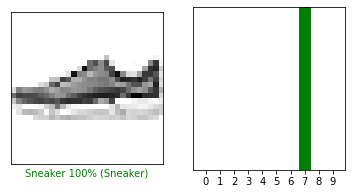

In [37]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

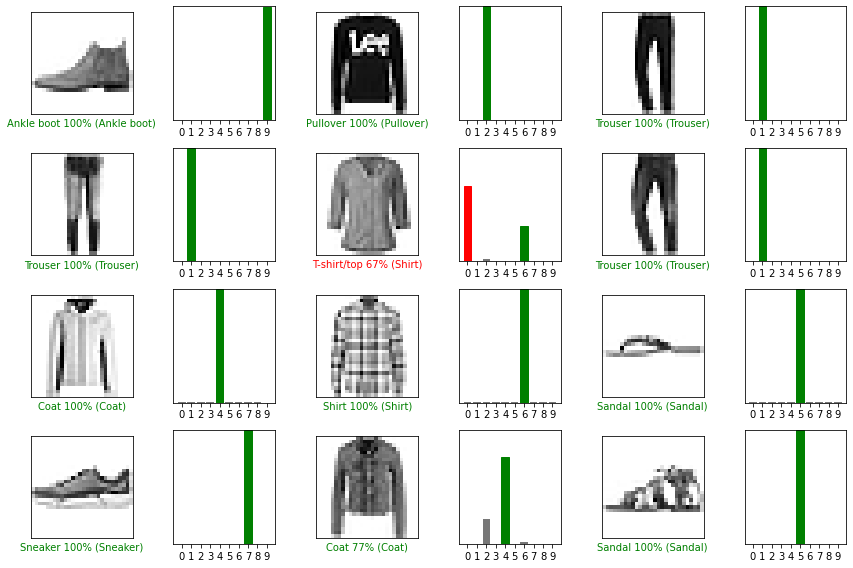

In [38]:
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [39]:

img = test_images[2]

print(img.shape)

(28, 28)


In [40]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [41]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.5367392e-10 1.0000000e+00 3.3549787e-15 1.2511385e-12 1.2290688e-15
  1.8113141e-20 2.5158200e-17 5.5699218e-29 1.0448894e-15 3.2804494e-23]]
